# Module 8: Deep Learning

## 8.1 Intro

## 8.2 TensorFlow and Keras

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.00 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

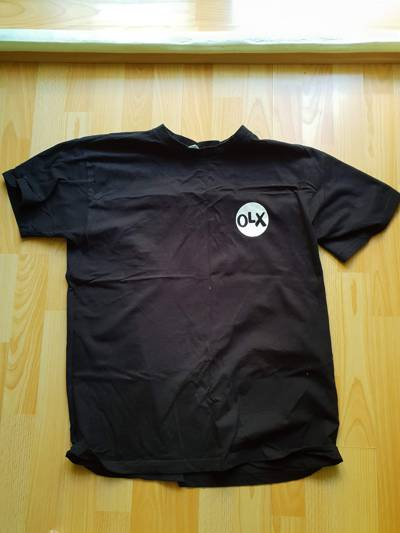

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img =load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

In [8]:
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
X = np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

## 8.4 Convolutional Neural Networks

## 8.5 Transfer Learning

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
train_ds=train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size=(150, 150),batch_size=32)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
X.shape

(32, 150, 150, 3)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds=val_gen.flow_from_directory('./clothing-dataset-small/validation', target_size=(150, 150),batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [ ]:
preds.shape

(32, 10)

In [ ]:
lr=0.01
optimizer=keras.optimizers.Adam(learning_rate=lr)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 236ms/step - accuracy: 0.5754 - loss: 1.5926 - val_accuracy: 0.7595 - val_loss: 0.9733
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.8310 - loss: 0.5227 - val_accuracy: 0.7830 - val_loss: 0.7736
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8952 - loss: 0.3168 - val_accuracy: 0.8035 - val_loss: 0.7744
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9283 - loss: 0.1950 - val_accuracy: 0.8006 - val_loss: 0.7703
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9427 - loss: 0.1585 - val_accuracy: 0.8123 - val_loss: 0.8299
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9661 - loss: 0.0982 - val_accuracy: 0.7918 - val_loss: 1.1069
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9445 - loss: 0.1569 - val_accuracy: 0.8182 - val_loss: 0.7969
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9751 - loss: 0.0734 - val_accuracy: 0.8123 - val_loss

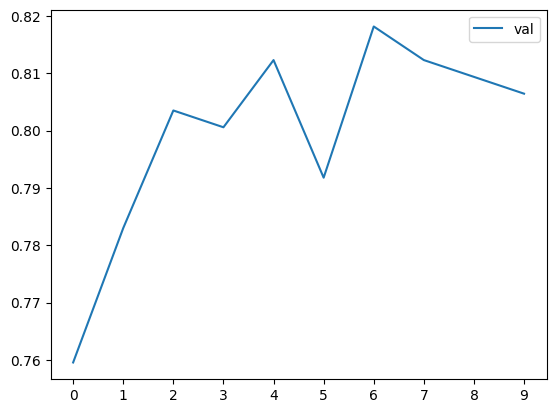

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## 8.7 Adjusting the learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores= {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print (lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print ()
    print ()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.1993 - loss: 2.2282 - val_accuracy: 0.4721 - val_loss: 1.6338
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.5053 - loss: 1.5085 - val_accuracy: 0.6041 - val_loss: 1.2658
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.6217 - loss: 1.2108 - val_accuracy: 0.6774 - val_loss: 1.0733
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.6606 - loss: 1.0625 - val_accuracy: 0.7185 - val_loss: 0.9570
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.7099 - loss: 0.9267 - val_accuracy: 0.7243 - val_loss: 0.8860
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.7236 - loss: 0.8715 - val_accuracy: 0.7537 - val_loss: 0.8282
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7390 - loss: 0.8158 - val_accuracy: 0.7625 - val_loss: 0.7901
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7761 - loss: 0.7436 - val_accurac

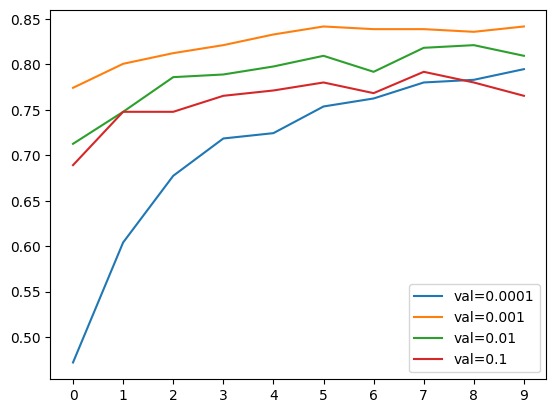

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [ ]:
lr = 0.001

## 8.7 Checkpointing

In [ ]:
model.save_weights('model_v1.weights.h5')

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.5301 - loss: 1.4565 - val_accuracy: 0.7595 - val_loss: 0.7458
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.7695 - loss: 0.6593 - val_accuracy: 0.7918 - val_loss: 0.6336
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8335 - loss: 0.5050 - val_accuracy: 0.7859 - val_loss: 0.6258
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8535 - loss: 0.4389 - val_accuracy: 0.8094 - val_loss: 0.5704
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.8938 - loss: 0.3632 - val_accuracy: 0.8094 - val_loss: 0.5497
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9101 - loss: 0.3311 - val_accuracy: 0.8328 - val_loss: 0.5447
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9175 - loss: 0.2863 - val_accuracy: 0.8240 - val_loss: 0.5491
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9431 - loss: 0.2390 - val_accuracy: 0

## 8.8 Adding More Layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.4026 - loss: 1.7394 - val_accuracy: 0.6657 - val_loss: 0.9862
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.7037 - loss: 0.9090 - val_accuracy: 0.7683 - val_loss: 0.7453
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7774 - loss: 0.6709 - val_accuracy: 0.7830 - val_loss: 0.6499
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.8164 - loss: 0.5318 - val_accuracy: 0.8123 - val_loss: 0.5974
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8611 - loss: 0.4383 - val_accuracy: 0.7947 - val_loss: 0.5768
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8935 - loss: 0.3530 - val_accuracy: 0.7977 - val_loss: 0.5642
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9072 - loss: 0.3186 - val_accuracy: 0.8035 - val_loss: 0.5652
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9309 - loss: 0.2779 - val_accuracy: 0

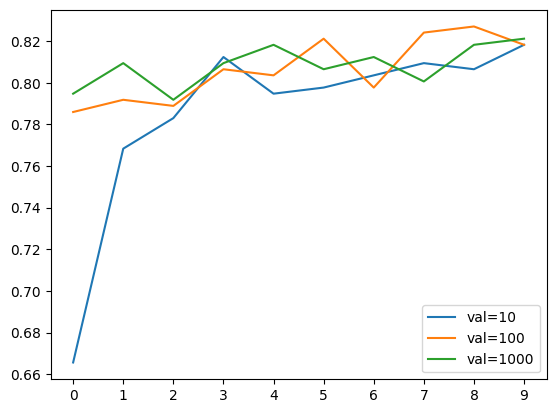

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and Dropout

In [23]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [24]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.5564 - loss: 1.3057 - val_accuracy: 0.7889 - val_loss: 0.6526
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8429 - loss: 0.4784 - val_accuracy: 0.8094 - val_loss: 0.5666
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8870 - loss: 0.3306 - val_accuracy: 0.8152 - val_loss: 0.5523
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9262 - loss: 0.2298 - val_accuracy: 0.8182 - val_loss: 0.5936
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.9571 - loss: 0.1676 - val_accuracy: 0.8006 - val_loss: 0.6277
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9751 - loss: 0.1134 - val_accuracy: 0.7977 - val_loss: 0.6160
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9857 - loss: 0.0858 - val_accuracy: 0.8006 - val_loss: 0.6772
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9887 - loss: 0.0638 - val_accuracy: 0.8182 - val_lo

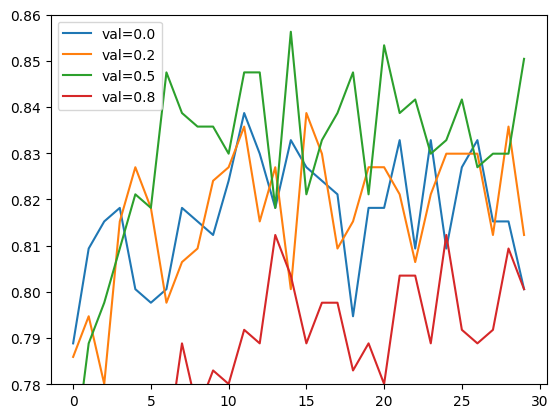

In [25]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

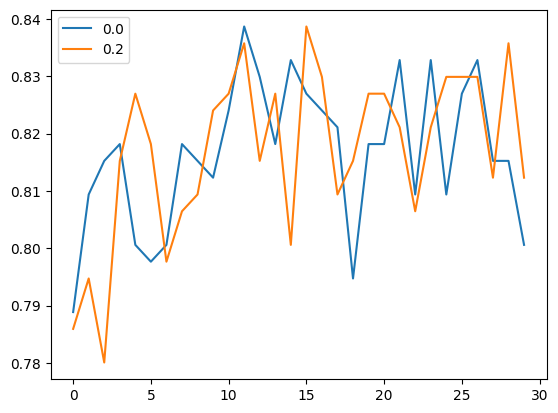

In [26]:

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data Augmentation

In [27]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [28]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.5262 - loss: 1.3900 - val_accuracy: 0.7889 - val_loss: 0.6513
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7876 - loss: 0.5896 - val_accuracy: 0.7918 - val_loss: 0.6200
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8339 - loss: 0.4787 - val_accuracy: 0.8065 - val_loss: 0.5651
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8937 - loss: 0.3432 - val_accuracy: 0.8006 - val_loss: 0.6061
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9075 - loss: 0.2784 - val_accuracy: 0.8182 - val_loss: 0.5354
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9318 - loss: 0.2151 - val_accuracy: 0.8152 - val_loss: 0.5626
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9433 - loss: 0.1942 - val_accuracy: 0.8152 - val_loss: 0.5701
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9613 - loss: 0.1400 - val_accuracy: 0.8

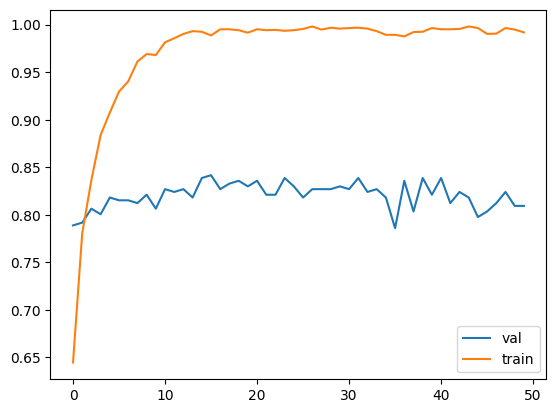

In [29]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a Larger Model

In [37]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [38]:
input_size = 299

In [39]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [40]:

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [41]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=5, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/5


KeyboardInterrupt: 

## 8.12 Using the model

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [44]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [45]:
model = keras.models.load_model('/content/xception_v4_1_04_0.891.keras')

In [46]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8857 - loss: 0.3877


[0.2917506992816925, 0.9112903475761414]

In [47]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [48]:
img = load_img(path, target_size=(299, 299))

In [49]:
import numpy as np

In [50]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [51]:

X = preprocess_input(X)

In [52]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [53]:

classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [54]:
dict(zip(classes, pred[0]))

{'dress': -3.5344102,
 'hat': -3.3809364,
 'longsleeve': -2.134018,
 'outwear': -1.8047725,
 'pants': 6.6435966,
 'shirt': -1.5882134,
 'shoes': -3.576692,
 'shorts': 2.0249662,
 'skirt': -3.4129016,
 't-shirt': -3.3988194}

In [56]:
dict(zip(classes, tf.round(tf.nn.sigmoid(pred[0]))))

{'dress': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'hat': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'longsleeve': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'outwear': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'pants': <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 'shirt': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'shoes': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'shorts': <tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 'skirt': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 't-shirt': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>}

In [57]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [58]:
dict(zip(classes, sigmoid(pred[0])))

{'dress': 0.028348856,
 'hat': 0.032896593,
 'longsleeve': 0.105834164,
 'outwear': 0.14127111,
 'pants': 0.9986993,
 'shirt': 0.1696354,
 'shoes': 0.02720713,
 'shorts': 0.8833935,
 'skirt': 0.03189468,
 't-shirt': 0.03233238}